In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# 01. 텐서 버전 확인

print(tf.__version__)

2.4.1


In [3]:
# 02. imdb 에서 데이터를 10000개만 로드 (영화 리뷰, 가장 많이 등장하는 단어)

imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17465344/17464789 [==============================] - 2s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [9]:
# 03. 훈련 데이터와 훈련 데이터 레이블을 출력

print("훈련 샘플 : {}, 훈련 레이블 : {}".format(len(train_data), len(train_labels)))
print('\n',train_data[0],'\n')

# 04. 첫번째 영화리뷰와 두번째 영화 리뷰의 길이가 다른 것을 확인
print(len(train_data[0]))
print(len(train_data[1]))

훈련 샘플 : 25000, 훈련 레이블 : 25000

 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

218
189


In [17]:
# 05. 내용을 확인

word_index = imdb.get_word_index( path = 'imdb_word_index.json' )

# word_index.items()  # 아이템 출력 확인
# 사용자 사전형으로 저장
word_index = { k : (v+3) for k, v in word_index.items() }
word_index

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# 06. 데이터의 내용을 확인
reverse_word_index = dict( [ (value, key) for (key, value) in word_index.items() ] )
reverse_word_index

# 숫자로 가져온 데이터(train_data)를 디코드해서 내용 보기
def decode_review(text):
    return ' '.join( [ reverse_word_index.get(i, '?') for i in text ] )

print(decode_review(train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [27]:
# 07. print(len(train_data[0])) print(len(train_data[1])) 218, 189 
#   -> 내용의 길이가 다르다. 256으로 맞추고 남은 부분은 0으로 채우자

train_data = keras.preprocessing.sequence.pad_sequences(
    train_data, maxlen=256, padding='post', value = word_index["<PAD>"]
)

test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, maxlen=256, padding='post', value = word_index["<PAD>"]
)

# 길이 확인
print(len(train_data[0])) 
print(len(train_data[1]))

# 데이터 확인
# print(train_data[0])
# print(train_data[1])
print(decode_review(train_data[0]))

256
256
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised

In [30]:
# 08. 모델 생성

vocab_size = 10000
model = keras.Sequential()
model.add( keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add( keras.layers.GlobalAveragePooling1D() )
model.add( keras.layers.Dense(16, activation='relu'))
model.add( keras.layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.save('RNNmodel.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
GlobalAveragePooling1D()

6*6 경우

h = 6
w = 6
d = 3
-> 6*6  6*6  6*6  

에서 1차원으로 리턴받아 평균 : GlobalAveragePooling1D()

->
h = 1
w = 1
d = 3


In [34]:
# 09. 훈련

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit( partial_x_train,
                     partial_y_train,
                     epochs = 40,
                     batch_size = 512,
                     validation_data = (x_val, y_val),
                     verbose = 1                   )

results = model.evaluate(test_data, test_labels, verbose=2)
print(results)

'''
- 결과 -
782/782 - 1s - loss: 0.4902 - accuracy: 0.8580
[0.4901551604270935, 0.8579999804496765]
'''

Epoch 1/40
30/30 [==============================] - 1s 20ms/step - loss: 0.1000 - accuracy: 0.9737 - val_loss: 0.3043 - val_accuracy: 0.8843
Epoch 2/40
30/30 [==============================] - 1s 18ms/step - loss: 0.0965 - accuracy: 0.9751 - val_loss: 0.3066 - val_accuracy: 0.8839
Epoch 3/40
30/30 [==============================] - 1s 19ms/step - loss: 0.0936 - accuracy: 0.9758 - val_loss: 0.3098 - val_accuracy: 0.8828
Epoch 4/40
30/30 [==============================] - 1s 19ms/step - loss: 0.0903 - accuracy: 0.9781 - val_loss: 0.3122 - val_accuracy: 0.8818
Epoch 5/40
30/30 [==============================] - 1s 19ms/step - loss: 0.0876 - accuracy: 0.9786 - val_loss: 0.3150 - val_accuracy: 0.8818
Epoch 6/40
30/30 [==============================] - 1s 19ms/step - loss: 0.0847 - accuracy: 0.9797 - val_loss: 0.3196 - val_accuracy: 0.8810
Epoch 7/40
30/30 [==============================] - 1s 20ms/step - loss: 0.0814 - accuracy: 0.9813 - val_loss: 0.3220 - val_accuracy: 0.8816
Epoch 8/40
30

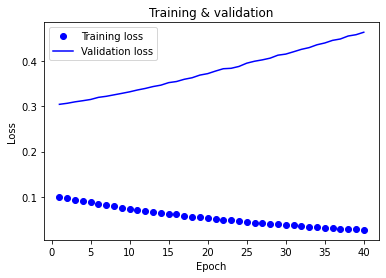

In [39]:
# 10. 시각화
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range( 1, len(acc) + 1 )
# 파란색 점 bo
plt.plot(epochs, loss, 'bo', label='Training loss')

# 파란색 실선 b
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title("Training & validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


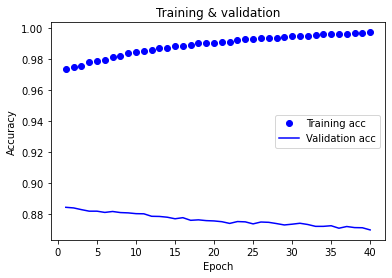

In [41]:
# 정답률

# 파란색 점 bo
plt.plot(epochs, acc, 'bo', label='Training acc')

# 파란색 실선 b
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title("Training & validation")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()